# Readability

In [67]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
#text_metrics is a python-file included in this project
from text_metrics import n_words, n_sentences, n_syllables, n_long_words
import pymorphy2

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')

In [5]:
df = pd.read_excel("vozn_sample_clean.xlsx")

In [6]:
def vozn_read_document_content(file_path):
    file_path = "poems_sample/" + file_path
    with open(file_path, 'r', encoding="utf8") as file:
        content = file.read()
    return content

In [7]:
df['text'] = df['path'].apply(vozn_read_document_content)

Очищаем тексты стихотворений от тегов, дат, заголовков

In [8]:
def remove_tags(text):
    clean_text = re.sub('<.*?>', '', text)
    return clean_text

def remove_text_after_tags(text):
    clean_text = re.sub(r'<[^&]>.*?$', '', text, 0, re.MULTILINE)
    return clean_text

In [9]:
df['text'] = df['text'].apply(remove_text_after_tags)

In [10]:
df['text'] = df['text'].apply(remove_tags)

In [11]:
df

,path,title,first_line,year,type,text
0,mozhno_i_ne_byt_poetom.txt,NaN,"Можно и не быть поэтом,",1976.0,text,"Можно и не быть поэтом,\nно нельзя терпеть, по..."
1,nosorog.txt,НОСОРОГ,Мы познали лишь предбанник.,2008.0,text,\n\nМы познали лишь предбанник.\nКраток срок.\...
2,leto_oligarkha.txt,ЛЕТО ОЛИГАРХА,"Опаловый ""Линкольн""",2003.0,text,"\nОпаловый «Линкольн».\nПолмира огуляв,\nскажи..."
3,a_ty_menya_pomnish.txt,А ТЫ МЕНЯ ПОМНИШЬ?,Ты мне прозвонилась сквозь страшную полночь:,1998.0,text,\n\nТы мне прозвонилась сквозь страшную полноч...
4,liturgija_let.txt,Литургия лет,"«Господь, помилуй меня,",1987.0,text,"\n\n«Господь, помилуй меня,\nГосподь, помилуй ..."
...,...,...,...,...,...,...
412,otkrytie_ges.txt,ОТКРЫТИЕ ГЭС,Мы — противники тусклого.,1950.0,text,\n\nМы — противники тусклого.\nМы приучены к ш...
413,v_gorakh.txt,В ГОРАХ,"Здесь пишется, как дышится, —",1950.0,text,"\n\nЗдесь пишется, как дышится, —\nВзволнованн..."
414,zagorskaya_lavra.txt,ЗАГОРСКАЯ ЛАВРА,Сопя носами сизыми,1950.0,text,\n\nСопя носами сизыми\nИ подоткнувши рясы —\n...
415,zemlya.txt,ЗЕМЛЯ,Мы любим босыми,1950.0,text,"\n\nМы любим босыми\nСтупать по земле,\nПо мяг..."


Считаем метрики: Оборнева, Мацковский, Flesh-Reading Ease для русского языка

In [65]:
def FRE(text):
    return 206.836 - 1.52*(n_words(text) / n_sentences(text)) - 65.14*(n_syllables(text) / n_words(text))

def matskovsky(text):
    return 0.62*(n_words(text) / n_sentences(text)) + 0.123*(n_long_words(text)/n_words(text)) + 0.051

def oborneva(text):
    return 0.5*(n_words(text) / n_sentences(text)) + 8.4*(n_syllables(text) / n_words(text)) - 15.59

In [13]:
df["matskovsky"] = df['text'].apply(matskovsky) 
df["oborneva"] = df['text'].apply(oborneva) 
df["fre"] = df['text'].apply(FRE)

In [14]:
df

,path,title,first_line,year,type,text,matskovsky,oborneva,fre
0,mozhno_i_ne_byt_poetom.txt,NaN,"Можно и не быть поэтом,",1976.0,text,"Можно и не быть поэтом,\nно нельзя терпеть, по...",12.463300,6.170000,85.240000
1,nosorog.txt,НОСОРОГ,Мы познали лишь предбанник.,2008.0,text,\n\nМы познали лишь предбанник.\nКраток срок.\...,5.141430,1.766367,91.472774
2,leto_oligarkha.txt,ЛЕТО ОЛИГАРХА,"Опаловый ""Линкольн""",2003.0,text,"\nОпаловый «Линкольн».\nПолмира огуляв,\nскажи...",4.726231,0.307692,101.233538
3,a_ty_menya_pomnish.txt,А ТЫ МЕНЯ ПОМНИШЬ?,Ты мне прозвонилась сквозь страшную полночь:,1998.0,text,\n\nТы мне прозвонилась сквозь страшную полноч...,8.440133,1.675556,104.770370
4,liturgija_let.txt,Литургия лет,"«Господь, помилуй меня,",1987.0,text,"\n\n«Господь, помилуй меня,\nГосподь, помилуй ...",7.085669,1.085569,104.196558
...,...,...,...,...,...,...,...,...,...
412,otkrytie_ges.txt,ОТКРЫТИЕ ГЭС,Мы — противники тусклого.,1950.0,text,\n\nМы — противники тусклого.\nМы приучены к ш...,8.003170,3.216280,91.119865
413,v_gorakh.txt,В ГОРАХ,"Здесь пишется, как дышится, —",1950.0,text,"\n\nЗдесь пишется, как дышится, —\nВзволнованн...",9.146808,5.403151,78.456877
414,zagorskaya_lavra.txt,ЗАГОРСКАЯ ЛАВРА,Сопя носами сизыми,1950.0,text,\n\nСопя носами сизыми\nИ подоткнувши рясы —\n...,9.782652,3.502908,95.707348
415,zemlya.txt,ЗЕМЛЯ,Мы любим босыми,1950.0,text,"\n\nМы любим босыми\nСтупать по земле,\nПо мяг...",6.350400,1.189754,100.564153


Смотрим, есть ли выбросы

In [36]:
sort_oborneva = df.sort_values(by=['oborneva'], ascending=False)
sort_oborneva

,path,title,first_line,year,type,text,matskovsky,oborneva,fre
83,vdol_morya.txt,ВДОЛЬ МОРЯ,"На закате бегу между пляжем и морем,",1998.0,text,"\n\nНа закате бегу между пляжем и морем,\nчто ...",138.344646,109.621211,-238.451175
56,osen_v_sigulde.txt,Осень в Сигулде,"Свисаю с вагонной площадки,",1961.0,text,"\n\nСвисаю с вагонной площадки,\nпрощайте,\n\n...",109.509224,84.486629,-153.156691
114,ulet1.txt,УЛЁТ 1,на деревьях висит тай,1997.0,text,\n\nна деревьях висит тай\nочки сели на кебаб\...,87.497170,70.161064,-125.752369
115,ulet2.txt,УЛЁТ 2\n,манит в дорогу ту,1997.0,text,\n\nманит в дорогу ту\nдьявол или Госпо\nдамоч...,72.617282,58.848462,-94.602974
367,pesnya_ofelii.txt,ПЕСНЯ ОФЕЛИИ,Мои дела —,1957.0,text,"\n\nМои дела —\nкак сажа бела,\nбыла чернобров...",65.789566,48.345849,-39.088906
...,...,...,...,...,...,...,...,...,...
408,shakhty.txt,ШАХТЫ,Здесь у парней,1950.0,text,\n\nЗдесь у парней\nУмный закон:\nУголь черней...,3.822430,-2.513389,119.721619
135,bezoblachnoe_nebo.txt,NaN,Безоблачное небо.,1984.0,text,Безоблачное небо.\nВороны черный зонт.\nСверкн...,3.015421,-2.604474,117.333895
223,na_stryome.txt,NaN,На стрёме,2001.0,text,"На стрёме\nзамрут века, дыханье затая.\nНас тр...",4.715760,-2.656000,124.216267
269,gar.txt,ГАРЬ,"Гарь, гарь, гарь...",1992.0,text,"\n\nГарь, гарь, гарь...\nНад страной — карр! к...",4.138655,-3.265155,126.751124


### Важно 

Изучив результаты вычислений оказалось целесообразным исключить из дальнейший расчетов стихотворения:

1) "Вдоль моря", 1998г.
2) "Тайгой", 1958г.
3) "Песня Офелии", 1957г.
4) "Улёт 1", 1997г.
5) "Улёт 2", 1997г.
6) "Осень в Сигулде", 1961г.
7) "К нам забредал булат...", 1960г.
8) "У речки игруны...", 1958г.
9) "Неужто это будет всё забыто...", 1978г.
10) "Белый котенок в макушке сосны...", 1991г.

Это связано с тем, что показатели по этим стихотворениям очень сильно завышены: из-за отсутствия пунктуации полностью или ее элементов (точек) или стилистических приемов, усложняющих синтаксис, но едва ли усложняющих восприятие (например все стихотворение "Вдоль моря" - это одно предложение). Данные по этим стихотворениям сильно искажают результаты вычислений. 

In [38]:
df = df[df.oborneva < 20]

In [44]:
df_by_decade = df[["year", "fre", "oborneva", "matskovsky"]]
df_by_decade['decade'] = df_by_decade['year'].apply(lambda x: x // 10 * 10)
df_by_decade = df_by_decade.drop("year", axis = 1)
df_by_decade = df_by_decade.groupby("decade").mean()
df_by_decade

C:\Users\x\AppData\Local\Temp\ipykernel_4704\2632905803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_decade['decade'] = df_by_decade['year'].apply(lambda x: x // 10 * 10)


,fre,oborneva,matskovsky
decade,,,
1950.0,96.032790,2.092420,7.000080
1960.0,90.890628,2.967140,7.433793
1970.0,88.994955,3.141346,7.290770
1980.0,91.018361,2.654149,6.827954
1990.0,93.003857,2.106738,6.235662
2000.0,90.156940,2.695412,6.687056


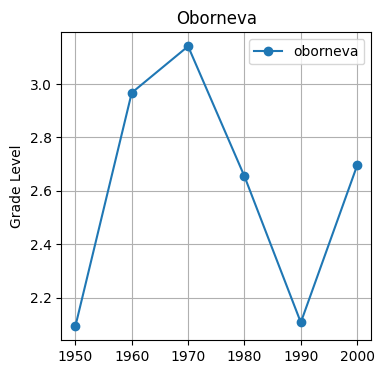

In [45]:
x = df_by_decade.index

plt.figure(figsize=(4, 4))
y = df_by_decade["oborneva"]
plt.plot(x, y, marker='o', label="oborneva")

plt.title('Oborneva')
plt.ylabel('Grade Level')
plt.legend()
plt.grid(True)
plt.show()

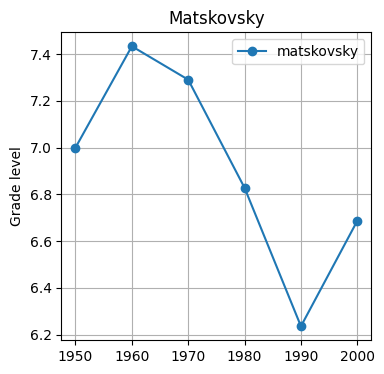

In [46]:
x = df_by_decade.index

plt.figure(figsize=(4, 4))
y = df_by_decade["matskovsky"]
plt.plot(x, y, marker='o', label="matskovsky")

plt.title('Matskovsky')
plt.ylabel('Grade level')
plt.legend()
plt.grid(True)
plt.show()

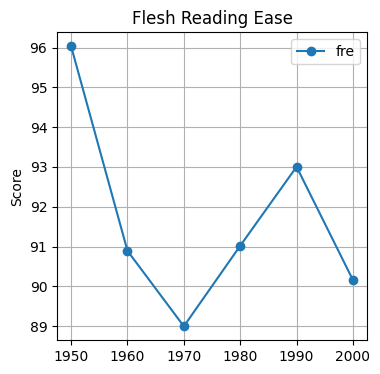

In [47]:
x = df_by_decade.index

plt.figure(figsize=(4, 4))
y = df_by_decade["fre"]
plt.plot(x, y, marker='o', label="fre")

plt.title('Flesh Reading Ease')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
df["matskovsky"].describe()

count    407.000000
mean       6.920976
std        2.579595
min        2.661889
25%        5.302578
50%        6.343446
75%        8.017430
max       26.424153
Name: matskovsky, dtype: float64

In [62]:
df["oborneva"].describe()

count    407.000000
mean       2.635504
std        2.641379
min       -3.703043
25%        0.929814
50%        2.357745
75%        3.940448
max       16.728235
Name: oborneva, dtype: float64

In [63]:
df["fre"].describe()

count    407.000000
mean      91.513520
std       13.450582
min       41.317429
25%       83.365755
50%       92.399251
75%       99.997819
max      126.751124
Name: fre, dtype: float64

# TTR

In [68]:
 def calculate_ttr(text):
    morph = pymorphy2.MorphAnalyzer()
    lemmatized_text = []
    words = text.split()
    for word in words:
        normalized_word = morph.parse(word.lower())[0].normal_form
        lemmatized_text.append(normalized_word)
    total_tokens = len(lemmatized_text)
    unique_tokens = len(set(lemmatized_text))
    ttr = unique_tokens / total_tokens
    return ttr

In [69]:
df['ttr'] = df['text'].apply(calculate_ttr)

C:\Users\x\AppData\Local\Temp\ipykernel_4704\3319024260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ttr'] = df['text'].apply(calculate_ttr)


In [70]:
df

,path,title,first_line,year,type,text,matskovsky,oborneva,fre,ttr
0,mozhno_i_ne_byt_poetom.txt,NaN,"Можно и не быть поэтом,",1976.0,text,"Можно и не быть поэтом,\nно нельзя терпеть, по...",12.463300,6.170000,85.240000,1.000000
1,nosorog.txt,НОСОРОГ,Мы познали лишь предбанник.,2008.0,text,\n\nМы познали лишь предбанник.\nКраток срок.\...,5.141430,1.766367,91.472774,0.796610
2,leto_oligarkha.txt,ЛЕТО ОЛИГАРХА,"Опаловый ""Линкольн""",2003.0,text,"\nОпаловый «Линкольн».\nПолмира огуляв,\nскажи...",4.726231,0.307692,101.233538,0.824324
3,a_ty_menya_pomnish.txt,А ТЫ МЕНЯ ПОМНИШЬ?,Ты мне прозвонилась сквозь страшную полночь:,1998.0,text,\n\nТы мне прозвонилась сквозь страшную полноч...,8.440133,1.675556,104.770370,0.637255
4,liturgija_let.txt,Литургия лет,"«Господь, помилуй меня,",1987.0,text,"\n\n«Господь, помилуй меня,\nГосподь, помилуй ...",7.085669,1.085569,104.196558,0.706667
...,...,...,...,...,...,...,...,...,...,...
412,otkrytie_ges.txt,ОТКРЫТИЕ ГЭС,Мы — противники тусклого.,1950.0,text,\n\nМы — противники тусклого.\nМы приучены к ш...,8.003170,3.216280,91.119865,0.850575
413,v_gorakh.txt,В ГОРАХ,"Здесь пишется, как дышится, —",1950.0,text,"\n\nЗдесь пишется, как дышится, —\nВзволнованн...",9.146808,5.403151,78.456877,0.689655
414,zagorskaya_lavra.txt,ЗАГОРСКАЯ ЛАВРА,Сопя носами сизыми,1950.0,text,\n\nСопя носами сизыми\nИ подоткнувши рясы —\n...,9.782652,3.502908,95.707348,0.743363
415,zemlya.txt,ЗЕМЛЯ,Мы любим босыми,1950.0,text,"\n\nМы любим босыми\nСтупать по земле,\nПо мяг...",6.350400,1.189754,100.564153,0.722222


In [71]:
df.to_excel("vozn_ru_readability_ttr.xlsx")